In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import sklearn
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

## Pretty variable display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## RANDOM STATE
seed=3

# Cluster data2 with EM Gaussian Mixture Models (copied from data2 versions)

Steps
- Determine number of clusters
- Run clustering
- Analyze clusters
- save df with cluster info for each player `em_player_clusters`

CONCLUSION:
- Need to further curate the initial stats

In [2]:
df = pd.read_csv('../data/pca3_99.csv', index_col=0)
df.head()
df.describe()

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_15,pc_16,pc_17,pc_18,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24
A.C. Green 96,4.455119,-2.983359,0.181936,-0.967597,0.852477,-2.900565,0.955602,1.826850,-2.567098,0.363804,...,0.082193,0.902740,-0.148011,-0.149064,-0.576336,1.084741,1.380855,0.081723,0.017004,-0.654580
Aaron McKie 96,-2.622212,-2.236079,-2.629880,-1.203383,-1.605217,-0.128617,1.770332,1.806729,0.509938,-0.910675,...,0.160451,-1.325331,-0.876818,1.021608,0.281881,0.571022,-0.074059,0.183598,0.170912,0.290594
Adam Keefe 96,6.000270,-3.249878,-1.474709,-0.393341,-2.323437,-1.893456,-0.165950,2.123409,1.270324,1.056059,...,0.221790,1.149842,-0.562339,0.530034,0.178761,-0.161607,0.496937,-0.131965,-0.169235,-0.323520
Allan Houston 96,-4.206984,0.315221,1.801221,2.235128,0.749353,-0.536486,-1.168856,0.855855,0.659788,-3.058227,...,0.034095,-0.139770,0.371217,-0.763498,-0.270038,0.026575,0.395680,0.137437,0.024283,-0.245663
Allen Iverson 96,-5.257438,6.088375,-2.221098,0.293810,-1.382227,-0.225248,0.821083,-0.897161,-1.331013,-2.180341,...,-1.170343,1.073684,0.882810,-0.214931,0.087983,-0.015257,0.138642,-0.467302,-0.372734,-0.058445


,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_15,pc_16,pc_17,pc_18,pc_19,pc_20,pc_21,pc_22,pc_23,pc_24
count,7.246000e+03,7.246000e+03,7246.000000,7.246000e+03,7.246000e+03,7.246000e+03,7246.000000,7246.000000,7.246000e+03,7.246000e+03,...,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03,7.246000e+03
mean,6.275840e-17,-6.668080e-17,0.000000,3.137920e-17,-3.137920e-17,3.137920e-17,0.000000,0.000000,1.568960e-17,-3.137920e-17,...,6.275840e-17,-7.844800e-18,-2.941800e-17,2.157320e-17,-1.568960e-17,-7.844800e-18,-4.706880e-17,1.372840e-17,2.549560e-17,6.864200e-18
std,4.658913e+00,3.707722e+00,2.307752,1.803931e+00,1.585436e+00,1.544262e+00,1.489312,1.380489,1.207881e+00,1.169018e+00,...,7.584192e-01,6.929023e-01,6.805092e-01,6.657073e-01,6.468244e-01,5.886603e-01,5.095748e-01,4.939947e-01,3.445404e-01,3.096852e-01
min,-9.183302e+00,-1.092264e+01,-8.388345,-6.239354e+00,-5.709217e+00,-6.636439e+00,-5.187159,-4.651986,-4.247074e+00,-3.858049e+00,...,-2.768178e+00,-2.638235e+00,-2.635437e+00,-2.321580e+00,-2.219106e+00,-2.202586e+00,-2.284820e+00,-1.924632e+00,-1.231300e+00,-1.044074e+00
25%,-3.872231e+00,-2.594299e+00,-1.508838,-1.152621e+00,-1.072726e+00,-1.033766e+00,-1.004634,-0.913417,-8.178285e-01,-8.393108e-01,...,-5.039701e-01,-4.638722e-01,-4.377132e-01,-4.524308e-01,-4.328292e-01,-3.851594e-01,-2.904317e-01,-3.282018e-01,-2.318867e-01,-1.971932e-01
50%,-1.213487e+00,-2.663317e-01,-0.031062,2.262145e-02,-5.105825e-02,-1.311034e-04,0.015583,0.008567,-4.715629e-02,-6.077964e-02,...,4.882674e-03,-2.067172e-03,-9.569867e-04,-1.771649e-02,-8.857739e-03,-1.245989e-02,4.452763e-02,7.121971e-04,-1.882594e-02,-2.140648e-02
75%,4.269286e+00,2.342415e+00,1.549861,1.191840e+00,1.030504e+00,1.023193e+00,1.003209,0.915667,7.950931e-01,7.524047e-01,...,5.087222e-01,4.436652e-01,4.342366e-01,4.281152e-01,4.287961e-01,3.786011e-01,3.173773e-01,3.289208e-01,2.115601e-01,1.662009e-01
max,1.201757e+01,1.514730e+01,9.999143,6.824310e+00,6.795643e+00,6.665247e+00,5.518845,5.387353,4.426556e+00,5.224049e+00,...,2.998252e+00,3.007950e+00,3.234543e+00,2.412784e+00,2.613972e+00,2.390888e+00,2.356213e+00,2.136210e+00,1.920971e+00,1.773238e+00


## EM GMM

### Determine number of clusters via GMM likelihood

C:\Users\alexk\anaconda3\envs\nba\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '


Wall time: 3min 28s


Text(0.5, 0, 'Number components')

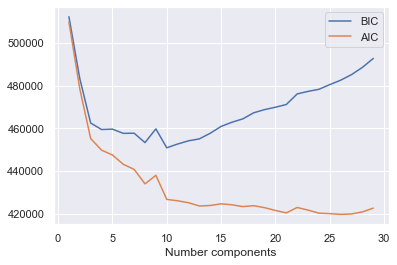

In [8]:
%%time
range_n_components = np.arange(1,30)
models = [GaussianMixture(n_components=n, covariance_type='full', random_state=seed).fit(df) for n in range_n_components]

plt.plot(range_n_components, [model.bic(df) for model in models], label='BIC')
plt.plot(range_n_components, [model.aic(df) for model in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Number components');

In [4]:
GMM = GaussianMixture(n_components=15)
soft_labels = GMM.fit(df).predict_proba(df)
hard_labels = GMM.predict(df)

### Create df with cluster ids and player index

In [5]:
df_cluster = pd.DataFrame(hard_labels, index=df.index, columns=['hard_label'])
soft_cols = ['cluster_' + str(n) for n in range(15)]
df_cluster[soft_cols] = soft_labels
df_cluster.shape
df_cluster.head()

(7246, 16)

,hard_label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
A.C. Green 96,12,7.295865e-22,0.000000e+00,1.226256e-39,0.000000,0.000000,1.705779e-239,1.473232e-115,7.532419e-70,3.636548e-214,1.473629e-66,4.099678e-193,1.187257e-03,9.988127e-01,1.415477e-98,5.705917e-299
Aaron McKie 96,7,6.815670e-10,0.000000e+00,1.568389e-49,0.000000,0.000000,4.851185e-05,2.503159e-10,9.999515e-01,2.967367e-17,2.917908e-08,1.686949e-15,2.541275e-85,2.001862e-28,1.863201e-09,1.422640e-22
Adam Keefe 96,3,1.490449e-10,6.262327e-29,1.665509e-72,0.999778,0.000222,0.000000e+00,2.279545e-227,1.947662e-125,0.000000e+00,3.471898e-125,3.604203e-306,1.971334e-11,1.964094e-13,1.294990e-217,0.000000e+00
Allan Houston 96,7,3.082196e-30,0.000000e+00,9.996867e-12,0.000000,0.000000,6.699613e-05,1.147611e-20,9.999285e-01,7.236655e-18,1.191266e-27,1.448386e-14,7.807108e-145,2.812666e-74,4.496949e-06,2.973958e-27
Allen Iverson 96,7,1.192893e-33,0.000000e+00,2.019271e-07,0.000000,0.000000,7.790823e-12,5.285332e-52,9.999998e-01,1.892025e-50,2.486440e-19,4.121716e-40,8.604183e-110,2.689571e-41,2.557752e-13,8.179080e-68


In [9]:
df_cluster.to_csv('../data/data_gmm_15_clusters.csv')

### Investigate cluster trends

In [6]:
df_cluster['hard_label'].value_counts()

3     1245
8     1025
7     1010
4      644
14     579
6      541
5      397
10     332
12     305
1      279
13     233
9      207
2      189
11     157
0      103
Name: hard_label, dtype: int64

In [20]:
n=8
df_cluster[df_cluster['hard_label']==n].sample(15)

,hard_label,cluster_0,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14
Manu Ginobili 06,8,8.189028e-28,0.0,4.706416e-17,0.0,0.0,2.273301e-16,1.427340e-04,0.000000e+00,0.975397,7.935050e-15,4.717136e-06,7.008619e-109,1.248809e-54,2.445548e-02,4.943182e-13
Monta Ellis 16,8,1.316848e-08,0.0,2.634391e-11,0.0,0.0,1.173448e-05,5.805222e-02,0.000000e+00,0.599321,2.814638e-01,6.110251e-02,1.661032e-75,1.799935e-13,4.897832e-05,2.978943e-12
James Jones 05,8,3.270606e-40,0.0,4.437476e-40,0.0,0.0,2.009921e-05,1.212540e-03,0.000000e+00,0.985488,6.633873e-53,1.608495e-26,3.987157e-176,5.959583e-114,9.104061e-03,4.175128e-03
Kevin Martin 12,8,2.608311e-40,0.0,8.759468e-37,0.0,0.0,2.324553e-04,7.664778e-08,0.000000e+00,0.933765,3.786872e-40,8.944834e-06,2.328989e-238,8.093394e-120,5.714160e-13,6.599367e-02
Delon Wright 18,8,7.537272e-08,0.0,4.620234e-34,0.0,0.0,2.891064e-09,7.503324e-04,0.000000e+00,0.999168,8.187720e-05,2.242854e-08,1.125442e-69,1.942932e-22,8.527521e-08,4.349095e-08
Joe Johnson 05,8,1.716216e-26,0.0,1.763175e-06,0.0,0.0,4.658272e-07,6.964836e-05,0.000000e+00,0.966609,3.346785e-07,2.996119e-02,3.734737e-88,1.499799e-24,3.357157e-03,4.372030e-13
Joe Johnson 13,8,1.045267e-34,0.0,1.646351e-24,0.0,0.0,3.303482e-05,4.576943e-06,0.000000e+00,0.999587,1.470267e-27,3.436120e-04,8.572427e-204,6.516710e-86,3.311212e-08,3.209048e-05
Avery Bradley 16,8,1.240327e-24,0.0,1.254068e-23,0.0,0.0,1.867358e-04,3.962932e-03,1.360140e-265,0.976852,2.833814e-37,3.309001e-08,1.444950e-136,7.056827e-82,1.598476e-02,3.013249e-03
Mike Bibby 06,8,8.786572e-31,0.0,7.065539e-11,0.0,0.0,1.219714e-05,6.502178e-07,0.000000e+00,0.981608,5.820074e-16,1.837296e-02,3.788978e-174,2.054661e-81,6.592732e-06,8.154086e-11
Morris Peterson 09,8,5.208055e-46,0.0,3.101167e-53,0.0,0.0,1.633036e-03,7.509872e-03,0.000000e+00,0.854833,1.594924e-59,4.092827e-19,1.339884e-276,1.814716e-177,1.779276e-12,1.360242e-01


In [7]:
## with 15 clusters
df_em = df_cluster.copy()

player = 'LeBron'
df_em[df_em.index.str.contains(player)]['hard_label']

player = 'Kobe'
df_em[df_em.index.str.contains(player)]['hard_label']

player = 'Gary Payton'
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Shaquille O'Neal"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Dwight Howard"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Eddie House"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Dirk"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "James Harden"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "JJ Redick"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Kevin Durant"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Klay Thompson"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Yao Ming"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Paul Pierce"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Kevin Garnett"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Pau Gasol"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Derrick Rose"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Steve Nash"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Deron Williams"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Jason Kidd"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Paul George"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Russell Westbrook"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Lou Williams"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Jamal Crawford"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Allen Iverson"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Carmelo Anthony"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Ben Wallace"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Danny Granger"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Roy Hibbert"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Lance Stephenson"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Richard Hamilton"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Marcus Camby"
df_em[df_em.index.str.contains(player)]['hard_label']

player = "Tim Duncan"
df_em[df_em.index.str.contains(player)]['hard_label']

LeBron James 03    7
LeBron James 04    2
LeBron James 05    2
LeBron James 06    2
LeBron James 07    2
LeBron James 08    2
LeBron James 09    2
LeBron James 10    2
LeBron James 11    2
LeBron James 12    2
LeBron James 13    2
LeBron James 14    2
LeBron James 15    2
LeBron James 16    2
LeBron James 17    2
LeBron James 18    2
LeBron James 19    2
Name: hard_label, dtype: int64

Kobe Bryant 96     7
Kobe Bryant 97     7
Kobe Bryant 98     2
Kobe Bryant 99     2
Kobe Bryant 00     2
Kobe Bryant 01     2
Kobe Bryant 02     2
Kobe Bryant 03     7
Kobe Bryant 04     7
Kobe Bryant 05     2
Kobe Bryant 06     2
Kobe Bryant 07    10
Kobe Bryant 08     2
Kobe Bryant 09     2
Kobe Bryant 10    10
Kobe Bryant 11     2
Kobe Bryant 12    10
Kobe Bryant 14    10
Kobe Bryant 15    10
Name: hard_label, dtype: int64

Gary Payton 96    7
Gary Payton 97    7
Gary Payton 98    7
Gary Payton 99    2
Gary Payton 00    7
Gary Payton 01    7
Gary Payton 02    7
Gary Payton 03    7
Gary Payton 04    7
Gary Payton 05    6
Gary Payton 06    8
Name: hard_label, dtype: int64

Shaquille O'Neal 96    11
Shaquille O'Neal 97    11
Shaquille O'Neal 98    11
Shaquille O'Neal 99    11
Shaquille O'Neal 00    11
Shaquille O'Neal 01    11
Shaquille O'Neal 02    11
Shaquille O'Neal 03    11
Shaquille O'Neal 04    11
Shaquille O'Neal 05     1
Shaquille O'Neal 06     1
Shaquille O'Neal 07     1
Shaquille O'Neal 08     1
Shaquille O'Neal 09     1
Shaquille O'Neal 10     3
Name: hard_label, dtype: int64

Dwight Howard 04    3
Dwight Howard 05    1
Dwight Howard 06    1
Dwight Howard 07    1
Dwight Howard 08    1
Dwight Howard 09    1
Dwight Howard 10    1
Dwight Howard 11    1
Dwight Howard 12    1
Dwight Howard 13    1
Dwight Howard 14    1
Dwight Howard 15    1
Dwight Howard 16    1
Dwight Howard 17    1
Dwight Howard 19    1
Name: hard_label, dtype: int64

Eddie House 01     7
Eddie House 02     7
Eddie House 03     7
Eddie House 04     5
Eddie House 05     5
Eddie House 06     5
Eddie House 07     5
Eddie House 08    14
Eddie House 09     8
Eddie House 10     5
Name: hard_label, dtype: int64

Dirk Nowitzki 98     7
Dirk Nowitzki 99     2
Dirk Nowitzki 00     2
Dirk Nowitzki 01     2
Dirk Nowitzki 02     2
Dirk Nowitzki 03     2
Dirk Nowitzki 04     2
Dirk Nowitzki 05     2
Dirk Nowitzki 06     2
Dirk Nowitzki 07     2
Dirk Nowitzki 08     2
Dirk Nowitzki 09     2
Dirk Nowitzki 10     2
Dirk Nowitzki 11     2
Dirk Nowitzki 12     2
Dirk Nowitzki 13     2
Dirk Nowitzki 14    13
Dirk Nowitzki 15    13
Dirk Nowitzki 16    13
Dirk Nowitzki 17    13
Dirk Nowitzki 18    14
Name: hard_label, dtype: int64

James Harden 09     8
James Harden 10     8
James Harden 11     8
James Harden 12    10
James Harden 13    10
James Harden 14    10
James Harden 15    10
James Harden 16    10
James Harden 17    10
James Harden 18    10
James Harden 19    10
Name: hard_label, dtype: int64

JJ Redick 08    8
JJ Redick 09    8
JJ Redick 10    8
JJ Redick 11    8
JJ Redick 12    8
JJ Redick 13    8
JJ Redick 14    8
JJ Redick 15    8
JJ Redick 16    8
JJ Redick 17    8
JJ Redick 18    8
JJ Redick 19    8
Name: hard_label, dtype: int64

Kevin Durant 07    10
Kevin Durant 08     2
Kevin Durant 09     2
Kevin Durant 10     2
Kevin Durant 11     2
Kevin Durant 12     2
Kevin Durant 13     2
Kevin Durant 14     2
Kevin Durant 15     2
Kevin Durant 16     2
Kevin Durant 17     2
Kevin Durant 18     2
Name: hard_label, dtype: int64

Klay Thompson 11    8
Klay Thompson 12    8
Klay Thompson 13    8
Klay Thompson 14    8
Klay Thompson 15    8
Klay Thompson 16    8
Klay Thompson 17    8
Klay Thompson 18    8
Name: hard_label, dtype: int64

Yao Ming 02    3
Yao Ming 03    3
Yao Ming 04    3
Yao Ming 05    1
Yao Ming 06    1
Yao Ming 07    1
Yao Ming 08    1
Name: hard_label, dtype: int64

Paul Pierce 98     7
Paul Pierce 99    13
Paul Pierce 00     2
Paul Pierce 01     2
Paul Pierce 02     2
Paul Pierce 03     2
Paul Pierce 04     7
Paul Pierce 05     2
Paul Pierce 06    13
Paul Pierce 07     8
Paul Pierce 08     8
Paul Pierce 09     8
Paul Pierce 10     8
Paul Pierce 11     2
Paul Pierce 12     2
Paul Pierce 13     8
Paul Pierce 14     6
Paul Pierce 15     8
Name: hard_label, dtype: int64

Kevin Garnett 96     4
Kevin Garnett 97     4
Kevin Garnett 98     4
Kevin Garnett 99    11
Kevin Garnett 00    11
Kevin Garnett 01    11
Kevin Garnett 02    11
Kevin Garnett 03    11
Kevin Garnett 04    11
Kevin Garnett 05    11
Kevin Garnett 06    11
Kevin Garnett 07     1
Kevin Garnett 08     1
Kevin Garnett 09    11
Kevin Garnett 10    11
Kevin Garnett 11    11
Kevin Garnett 12     1
Kevin Garnett 13     3
Kevin Garnett 14     4
Name: hard_label, dtype: int64

Pau Gasol 01     4
Pau Gasol 02     4
Pau Gasol 03     4
Pau Gasol 04     4
Pau Gasol 05     1
Pau Gasol 06     1
Pau Gasol 07     1
Pau Gasol 08     1
Pau Gasol 09     1
Pau Gasol 10     1
Pau Gasol 11    11
Pau Gasol 12     4
Pau Gasol 13    11
Pau Gasol 14     1
Pau Gasol 15    11
Pau Gasol 16    13
Pau Gasol 17    13
Name: hard_label, dtype: int64

Derrick Rose 08    12
Derrick Rose 09     2
Derrick Rose 10    10
Derrick Rose 11    10
Derrick Rose 14    10
Derrick Rose 15     9
Derrick Rose 16     9
Derrick Rose 18    10
Derrick Rose 19    10
Name: hard_label, dtype: int64

Steve Nash 97     7
Steve Nash 98     7
Steve Nash 99     5
Steve Nash 00     7
Steve Nash 01     7
Steve Nash 02     7
Steve Nash 03     7
Steve Nash 04     7
Steve Nash 05    10
Steve Nash 06    10
Steve Nash 07    10
Steve Nash 08    10
Steve Nash 09    10
Steve Nash 10    10
Steve Nash 11    10
Steve Nash 12    10
Name: hard_label, dtype: int64

Deron Williams 05     8
Deron Williams 06     8
Deron Williams 07     8
Deron Williams 08    10
Deron Williams 09     8
Deron Williams 10     8
Deron Williams 11    10
Deron Williams 12     8
Deron Williams 13     8
Deron Williams 14     8
Deron Williams 15    10
Deron Williams 16    10
Name: hard_label, dtype: int64

Jason Kidd 96    7
Jason Kidd 97    7
Jason Kidd 98    7
Jason Kidd 99    7
Jason Kidd 00    7
Jason Kidd 01    7
Jason Kidd 02    7
Jason Kidd 03    7
Jason Kidd 04    7
Jason Kidd 05    5
Jason Kidd 06    5
Jason Kidd 07    5
Jason Kidd 08    5
Jason Kidd 09    5
Jason Kidd 10    5
Jason Kidd 11    5
Jason Kidd 12    5
Name: hard_label, dtype: int64

Paul George 10     6
Paul George 11     8
Paul George 12     8
Paul George 13    10
Paul George 15    10
Paul George 16    10
Paul George 17     8
Paul George 18    10
Paul George 19    10
Name: hard_label, dtype: int64

Russell Westbrook 08     9
Russell Westbrook 09     9
Russell Westbrook 10     9
Russell Westbrook 11     9
Russell Westbrook 12    10
Russell Westbrook 13    10
Russell Westbrook 14    10
Russell Westbrook 15    10
Russell Westbrook 16    10
Russell Westbrook 17    10
Russell Westbrook 18    10
Russell Westbrook 19     2
Name: hard_label, dtype: int64

Lou Williams 07     9
Lou Williams 08    10
Lou Williams 09     8
Lou Williams 10    10
Lou Williams 11    10
Lou Williams 12     8
Lou Williams 13     8
Lou Williams 14    10
Lou Williams 15    10
Lou Williams 16    10
Lou Williams 17    10
Lou Williams 18    10
Lou Williams 19    10
Name: hard_label, dtype: int64

Jamal Crawford 00     5
Jamal Crawford 01     5
Jamal Crawford 02     7
Jamal Crawford 03     7
Jamal Crawford 04     7
Jamal Crawford 05     9
Jamal Crawford 06    10
Jamal Crawford 07    10
Jamal Crawford 08    10
Jamal Crawford 09     8
Jamal Crawford 10    10
Jamal Crawford 11    10
Jamal Crawford 12    10
Jamal Crawford 13    10
Jamal Crawford 14    10
Jamal Crawford 15     8
Jamal Crawford 16     8
Jamal Crawford 17     8
Jamal Crawford 18    10
Name: hard_label, dtype: int64

Allen Iverson 96     7
Allen Iverson 97     7
Allen Iverson 98     2
Allen Iverson 99     2
Allen Iverson 00     2
Allen Iverson 01     2
Allen Iverson 02     2
Allen Iverson 03     2
Allen Iverson 04     2
Allen Iverson 05     2
Allen Iverson 06     2
Allen Iverson 07    10
Allen Iverson 08     2
Allen Iverson 09     9
Name: hard_label, dtype: int64

Carmelo Anthony 03     7
Carmelo Anthony 04     7
Carmelo Anthony 05     2
Carmelo Anthony 06     2
Carmelo Anthony 07     2
Carmelo Anthony 08     2
Carmelo Anthony 09     2
Carmelo Anthony 10     2
Carmelo Anthony 11     2
Carmelo Anthony 12     2
Carmelo Anthony 13     2
Carmelo Anthony 14     2
Carmelo Anthony 15     2
Carmelo Anthony 16     2
Carmelo Anthony 17     8
Carmelo Anthony 19    13
Name: hard_label, dtype: int64

Ben Wallace 97    3
Ben Wallace 98    3
Ben Wallace 99    3
Ben Wallace 00    4
Ben Wallace 01    3
Ben Wallace 02    4
Ben Wallace 03    4
Ben Wallace 04    4
Ben Wallace 05    3
Ben Wallace 06    4
Ben Wallace 07    3
Ben Wallace 08    3
Ben Wallace 09    3
Ben Wallace 10    4
Ben Wallace 11    4
Name: hard_label, dtype: int64

Danny Granger 05     6
Danny Granger 06     8
Danny Granger 07     8
Danny Granger 08     8
Danny Granger 09     8
Danny Granger 10     8
Danny Granger 11     8
Danny Granger 13    14
Danny Granger 14    14
Name: hard_label, dtype: int64

Roy Hibbert 08    3
Roy Hibbert 09    1
Roy Hibbert 10    3
Roy Hibbert 11    1
Roy Hibbert 12    1
Roy Hibbert 13    1
Roy Hibbert 14    3
Roy Hibbert 15    3
Name: hard_label, dtype: int64

Lance Stephenson 12    6
Lance Stephenson 13    6
Lance Stephenson 14    9
Lance Stephenson 15    8
Lance Stephenson 17    8
Lance Stephenson 18    8
Name: hard_label, dtype: int64

Richard Hamilton 99    12
Richard Hamilton 00     7
Richard Hamilton 01     4
Richard Hamilton 02     2
Richard Hamilton 03    12
Richard Hamilton 04     2
Richard Hamilton 05     2
Richard Hamilton 06     2
Richard Hamilton 07     2
Richard Hamilton 08     2
Richard Hamilton 09     2
Richard Hamilton 10     2
Richard Hamilton 11     2
Richard Hamilton 12    12
Name: hard_label, dtype: int64

Marcus Camby 96     4
Marcus Camby 97     3
Marcus Camby 98     3
Marcus Camby 99     4
Marcus Camby 00    12
Marcus Camby 01     3
Marcus Camby 02    12
Marcus Camby 03     3
Marcus Camby 04     3
Marcus Camby 05     4
Marcus Camby 06     3
Marcus Camby 07     4
Marcus Camby 08     1
Marcus Camby 09     4
Marcus Camby 10     3
Marcus Camby 11     4
Name: hard_label, dtype: int64

Tim Duncan 97     3
Tim Duncan 98     4
Tim Duncan 99     4
Tim Duncan 00    11
Tim Duncan 01     4
Tim Duncan 02    11
Tim Duncan 03    11
Tim Duncan 04     4
Tim Duncan 05    11
Tim Duncan 06    11
Tim Duncan 07     1
Tim Duncan 08     1
Tim Duncan 09     1
Tim Duncan 10     1
Tim Duncan 11     1
Tim Duncan 12     1
Tim Duncan 13     1
Tim Duncan 14     1
Tim Duncan 15     3
Name: hard_label, dtype: int64